## US_VISA Prediction 
* Understanding the problem statement
* Data collections
* Exploring the data 
* Data cleaning 
* Data pre processing 
* Model training 
* Choosing the best model 


In [10]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

In [11]:
df = pd.read_csv("/Users/anand/Desktop/MLA_Project/EasyVisa.csv")
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [12]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

### Shape of the data 

In [13]:
df.shape

(25480, 12)

### Summary of the data set 

In [14]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


#### cheking the data types 

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


#### Exploring Data

In [16]:
numerical_features = [features for features in df.columns if df[features].dtype != 'O']
categorical_features = [features for features in df.columns if df[features].dtype == 'O']

print("Numerical Features: ", numerical_features)
print("Categorical Features " , categorical_features)

Numerical Features:  ['no_of_employees', 'yr_of_estab', 'prevailing_wage']
Categorical Features  ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [17]:
for col in categorical_features:
    print(df[col].value_counts(normalize = True) * 100)

case_id
EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
region_of_employment
Northeast    28.237834
South        27.539246
West         25.847724
Midwest      16.903454
Island        1.471743
Name: proportion, dtype: float64
unit_o

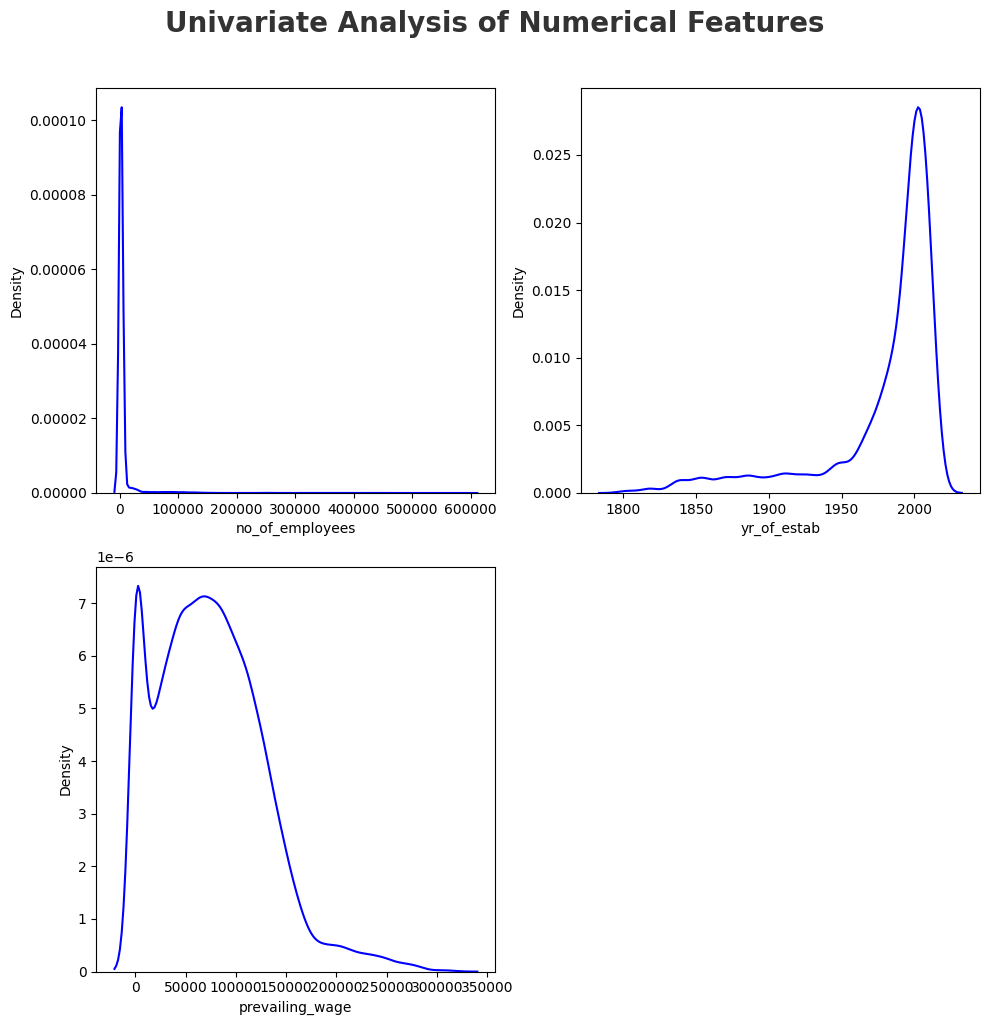

In [18]:
plt.figure(figsize=(10 , 10))
plt.suptitle("Univariate Analysis of Numerical Features", 
             fontsize=20, fontweight="bold", alpha=0.8, y=1.02)

for i in range(0 , len(numerical_features)):
    plt.subplot(2, 2, i + 1) 
    sns.kdeplot(x = df[numerical_features[i]] , color='blue')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()
    
plt.show()

#### Insights 
* no of employees is more skewed
* year of establisment  is skewed to the right
* AS because we might have a lot of outliers


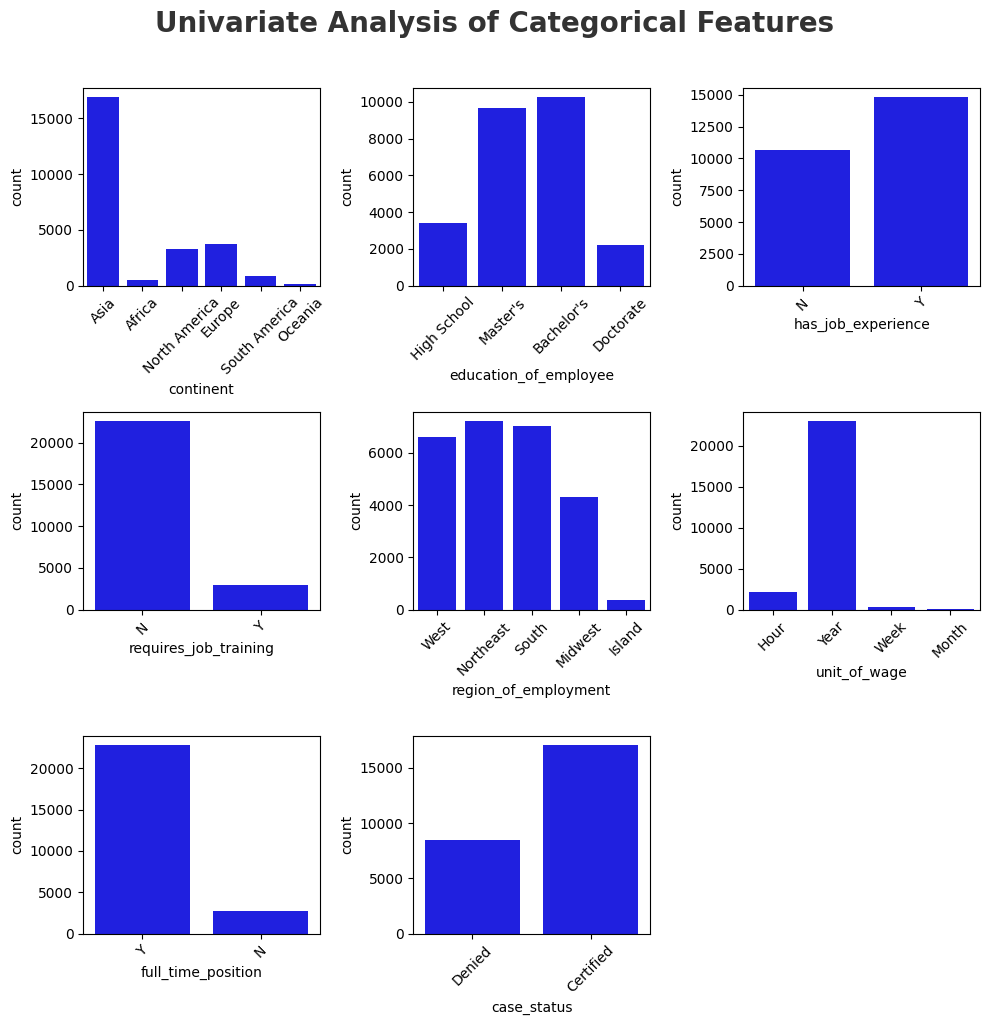

In [19]:
# Ensure "case_id" is removed only if it exists in the list
if "case_id" in categorical_features:
    categorical_features.remove("case_id")

plt.figure(figsize=(10 , 10))
plt.suptitle("Univariate Analysis of Categorical Features", 
             fontsize=20, fontweight="bold", alpha=0.8, y=1.02)

# Loop through categorical features
for i in range(0 , len(categorical_features)):
    plt.subplot(3, 3, i + 1)  # Assuming up to 9 plots (3x3 grid)
    sns.countplot(x=df[categorical_features[i]], color='blue')
    plt.xlabel(categorical_features[i])  # Set appropriate label
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability
    plt.tight_layout()

plt.show()


In [20]:
discreate_features = [features for features in numerical_features if len(df[features].unique())<= 25]
continuous_features = [features for features in numerical_features if len(df[features].unique() > 25)]

print("we have {} discreate features : {}" .format(len(discreate_features) , discreate_features))
print("we have {} continuous features : {}" .format(len(continuous_features) , continuous_features))

we have 0 discreate features : []
we have 3 continuous features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


In [21]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


#### Here we need to do the Hypothesis test to make sure which all columns are correlate with the target column That is we need to check if these features are make useful to our prediction 

In [22]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['case_status'], df[feature]))[1] < 0.05:
        chi2_test.append("Reject Null Hypothesis")
    else:
        chi2_test.append("Fail to Reject Null Hypothesis")

result = pd.DataFrame(data=[categorical_features , chi2_test]).T
result.columns = ['Column' , 'Hypothesis Result']
result
    

,Column,Hypothesis Result
0,continent,Reject Null Hypothesis
1,education_of_employee,Reject Null Hypothesis
2,has_job_experience,Reject Null Hypothesis
3,requires_job_training,Fail to Reject Null Hypothesis
4,region_of_employment,Reject Null Hypothesis
5,unit_of_wage,Reject Null Hypothesis
6,full_time_position,Reject Null Hypothesis
7,case_status,Reject Null Hypothesis


In [23]:
continuous_features

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

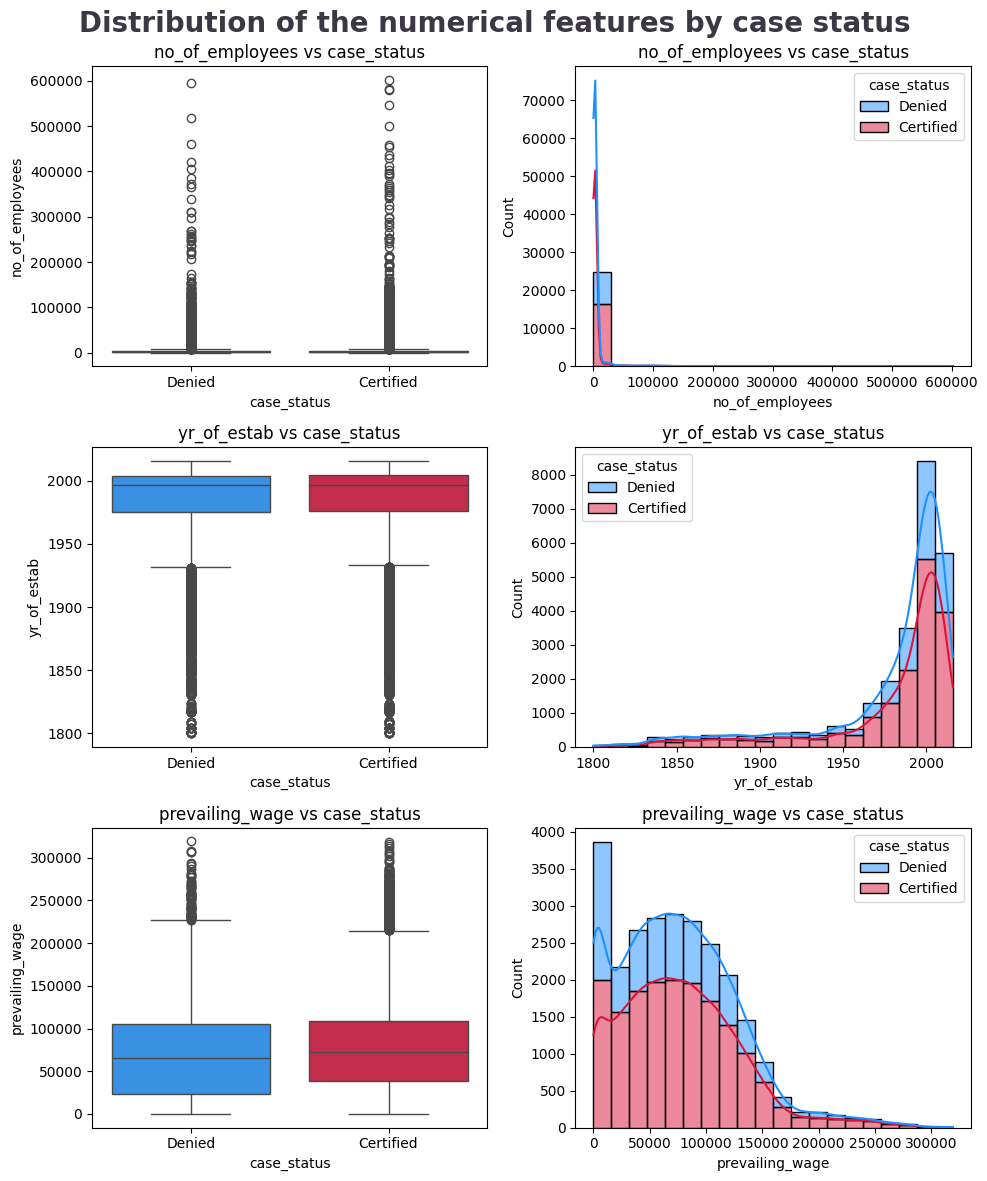

In [24]:
clr = ['#1E90FF', '#DC143C']
fig, ax = plt.subplots(3, 2, figsize=(10, 12))
fig.suptitle("Distribution of the numerical features by case status", color='#3C3744', 
             fontsize=20, fontweight='bold', ha='center')

# Assuming 'continuous_features' is a list of feature names
for i, feature in enumerate(continuous_features):
    sns.boxplot(data=df, x='case_status', y=feature, palette=clr, ax=ax[i, 0])
    ax[i, 0].set_title(f'{feature} vs case_status')
    
    sns.histplot(data=df, x=feature, hue='case_status', bins=20, kde=True, 
                 multiple='stack', palette=clr, ax=ax[i, 1])
    ax[i, 1].set_title(f'{feature} vs case_status')

plt.tight_layout()
plt.show()

In [25]:
df.groupby('continent')['case_status'].value_counts(normalize = True).to_frame()*100

proportion
continent     case_status            
Africa        Certified     72.050817
              Denied        27.949183
Asia          Certified     65.310480
              Denied        34.689520
Europe        Certified     79.233655
              Denied        20.766345
North America Certified     61.877278
              Denied        38.122722
Oceania       Certified     63.541667
              Denied        36.458333
South America Certified     57.863850
              Denied        42.136150

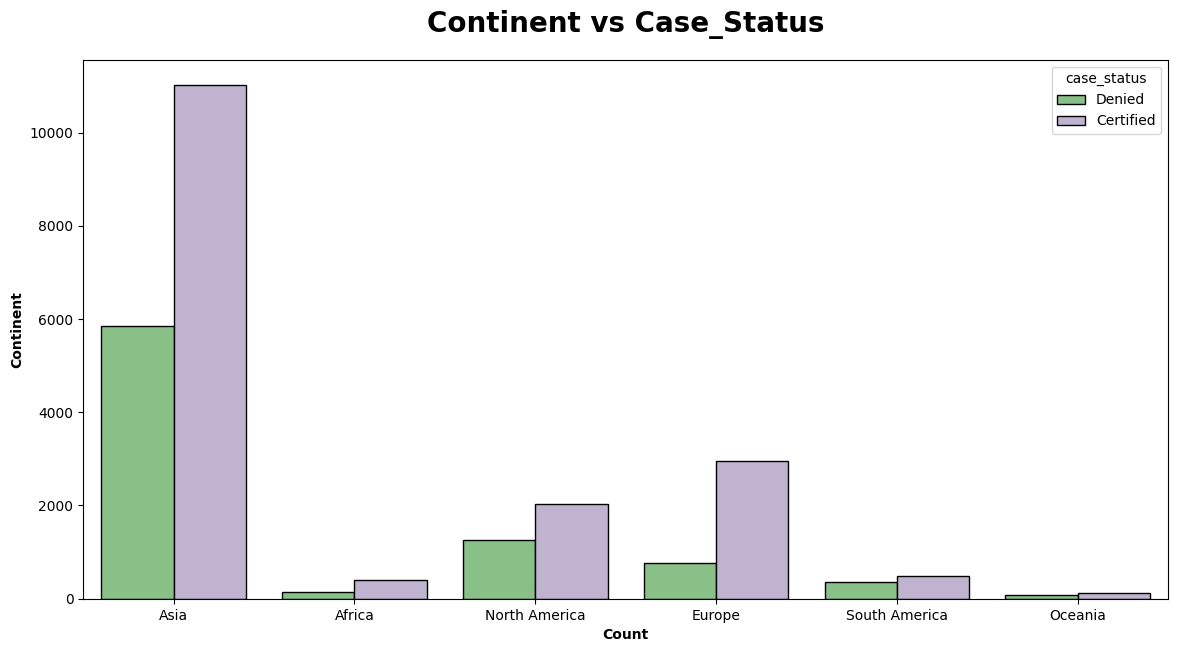

In [26]:
plt.subplots(figsize = (14 ,7))
sns.countplot(x = 'continent' , hue = 'case_status' , data = df , ec = 'black' , palette='Accent')
plt.title("Continent vs Case_Status" , weight = 'bold' , fontsize = 20 , pad = 20)
plt.xlabel("Count" , weight = "bold")
plt.ylabel("Continent" , weight = "bold")
plt.show()

#### Education has any impact in the Case status

In [27]:
df.groupby('education_of_employee')['case_status'].value_counts(normalize = True).to_frame()*100

proportion
education_of_employee case_status            
Bachelor's            Certified     62.214188
                      Denied        37.785812
Doctorate             Certified     87.226277
                      Denied        12.773723
High School           Denied        65.964912
                      Certified     34.035088
Master's              Certified     78.627777
                      Denied        21.372223

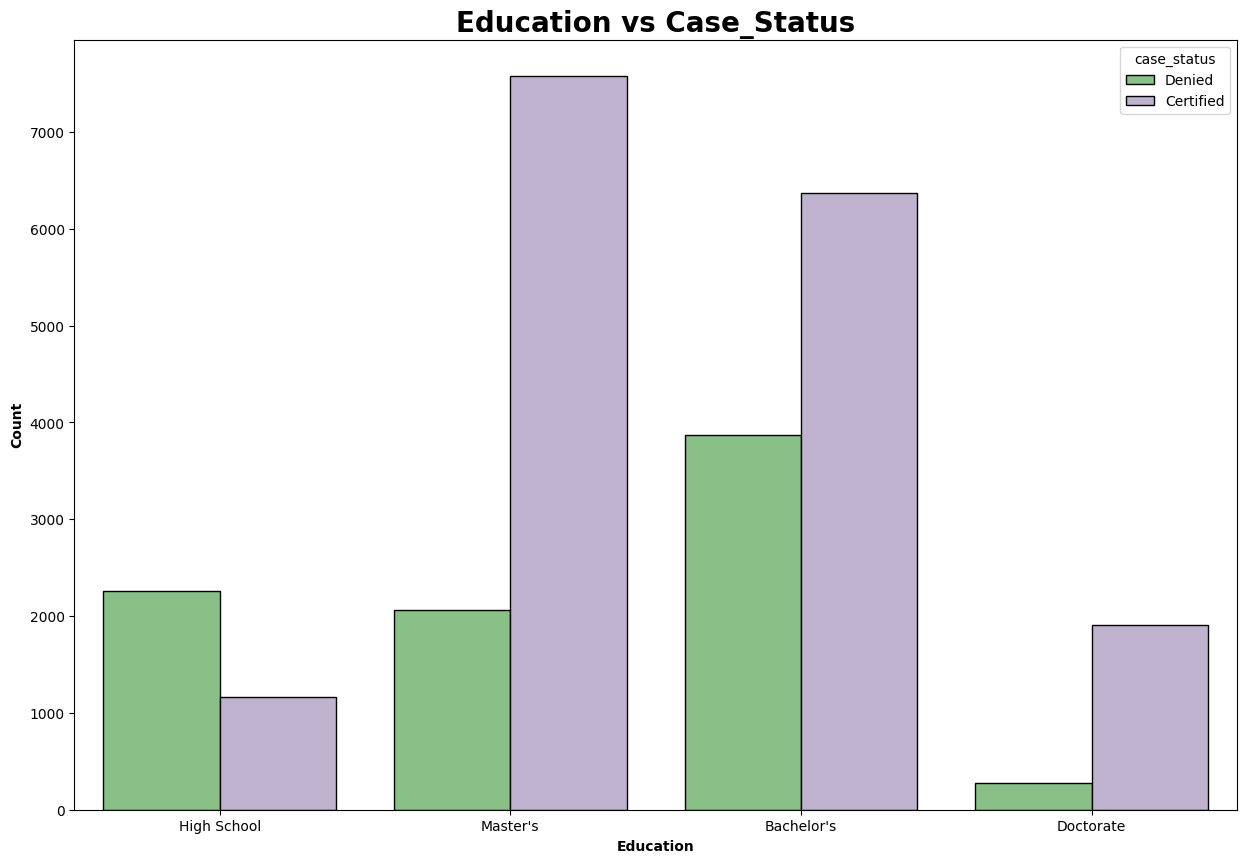

In [28]:
plt.subplots(figsize=(15, 10))
sns.countplot(x="education_of_employee", data=df, hue="case_status", ec='black', palette="Accent")
plt.title("Education vs Case_Status", weight="bold", fontsize=20)
plt.xlabel("Education", weight="bold")
plt.ylabel("Count", weight="bold")
plt.show()


##### Job experience has an impact in the case status 

In [29]:
df.groupby("has_job_experience")['case_status'].value_counts(normalize = True).to_frame()*100

proportion
has_job_experience case_status            
N                  Certified     56.134108
                   Denied        43.865892
Y                  Certified     74.476422
                   Denied        25.523578

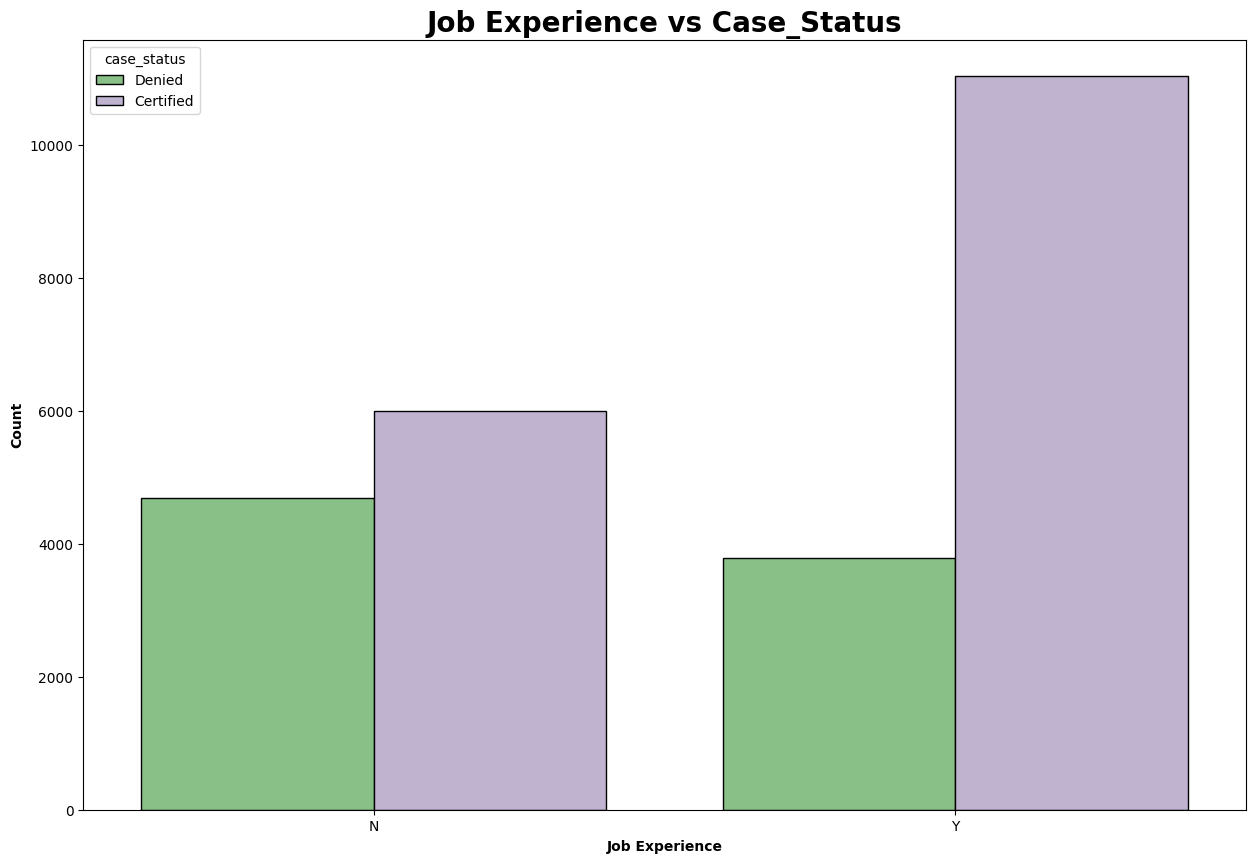

In [30]:
plt.figure(figsize=(15,10))
sns.countplot(x = 'has_job_experience' , data = df , hue = 'case_status' , ec = 'black' , palette='Accent')
plt.title("Job Experience vs Case_Status" , weight = 'bold' , fontsize = 20)
plt.xlabel("Job Experience" , weight = 'bold')
plt.ylabel("Count" , weight = 'bold')
plt.show()

### if the employee requires job training does that has any impact on the Case status

In [31]:
df.groupby("requires_job_training")['case_status'].value_counts(normalize = True).to_frame()*100

proportion
requires_job_training case_status            
N                     Certified     66.645949
                      Denied        33.354051
Y                     Certified     67.884941
                      Denied        32.115059

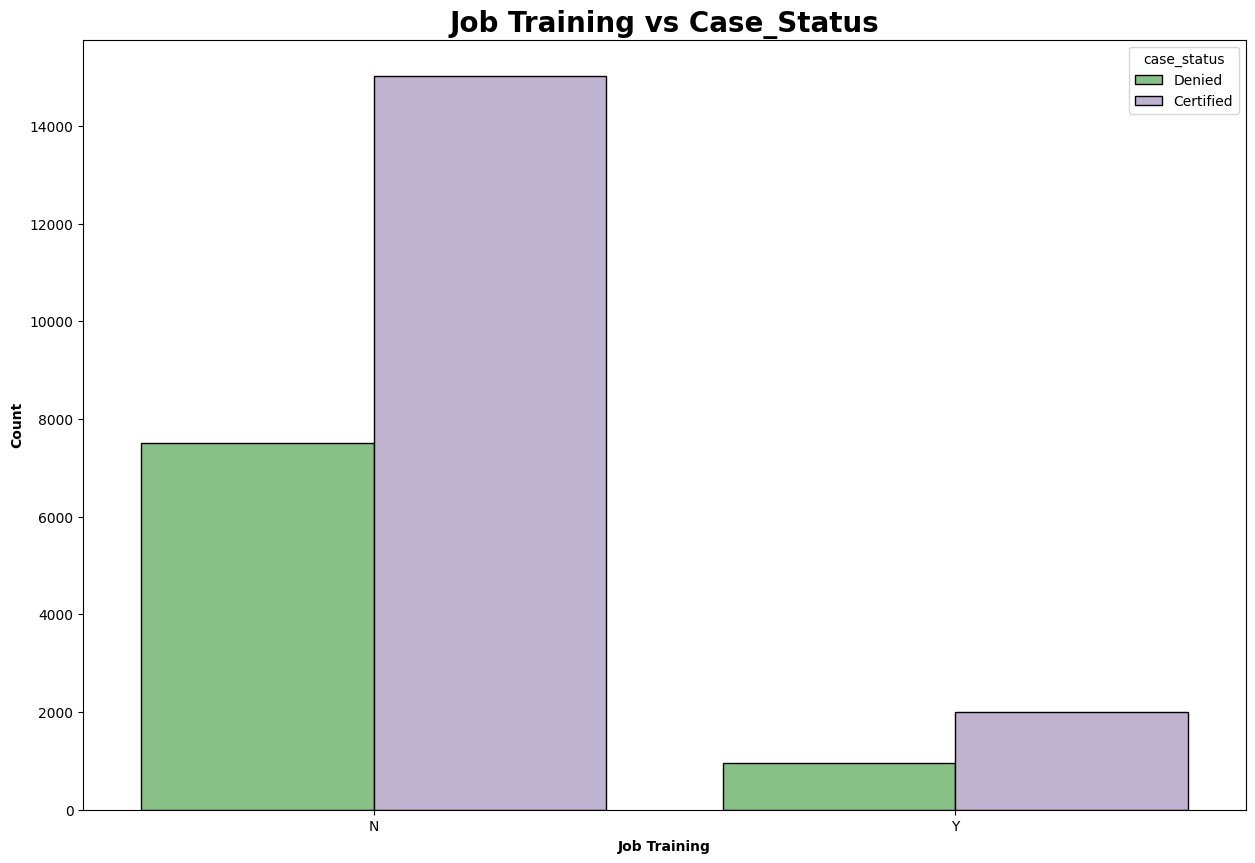

In [32]:
plt.figure(figsize=(15,10))
sns.countplot(x = 'requires_job_training' , data = df , hue = 'case_status' , ec = 'black' , palette='Accent')
plt.title("Job Training vs Case_Status" , weight = 'bold' , fontsize = 20)
plt.xlabel("Job Training" , weight = 'bold')
plt.ylabel("Count" , weight = 'bold')
plt.show()

#### Insights
* No training for the job tend to have the more success rate then the one who need the Job trainig 

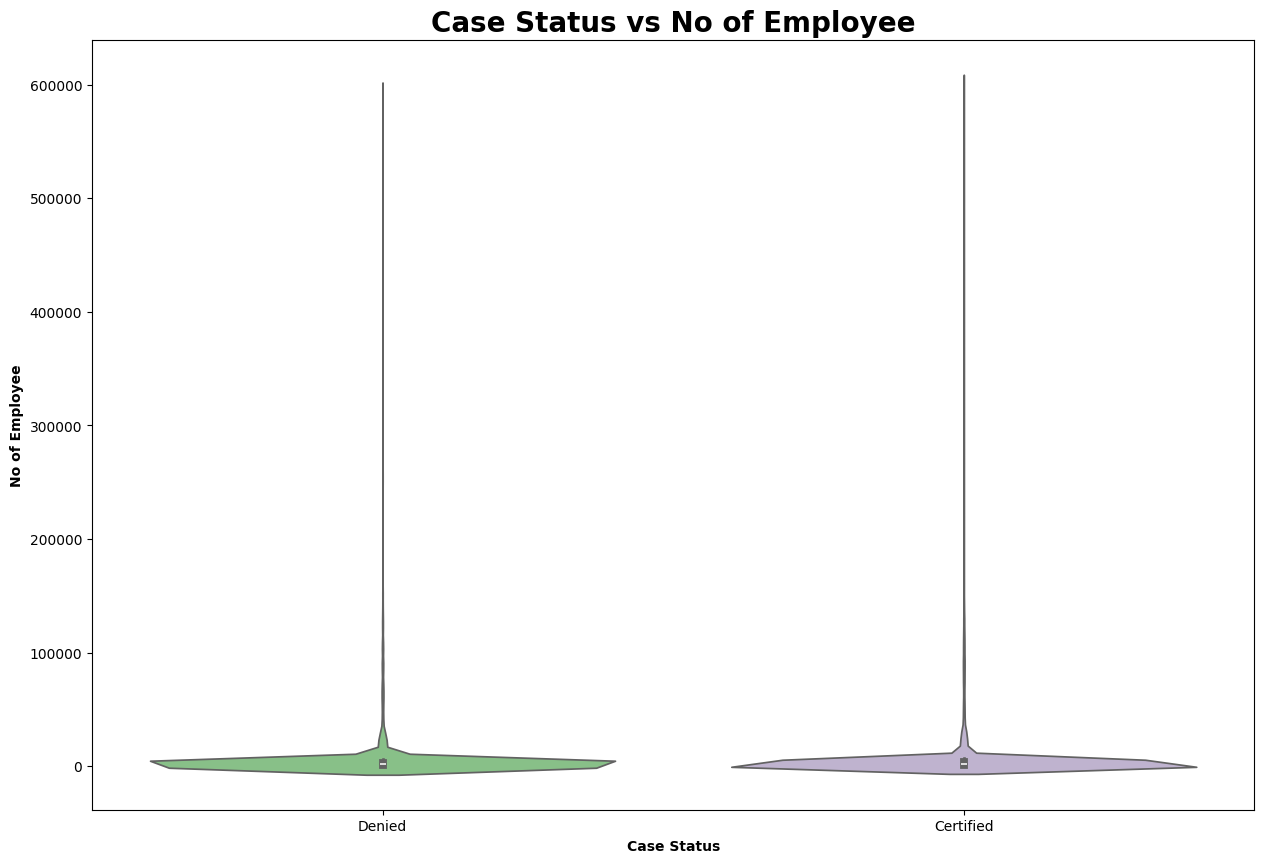

In [33]:
plt.figure(figsize=(15,10))
sns.violinplot(x = "case_status" , y = "no_of_employees" , data = df , palette="Accent")
plt.title("Case Status vs No of Employee" , weight = 'bold' , fontsize = 20)
plt.xlabel("Case Status" , weight = 'bold')
plt.ylabel("No of Employee" , weight = 'bold')
plt.show()

#### Unit of wages has any impact in the Case status

In [34]:
df.groupby('unit_of_wage')['case_status'].value_counts(normalize = True).to_frame()*100

proportion
unit_of_wage case_status            
Hour         Denied        65.368567
             Certified     34.631433
Month        Certified     61.797753
             Denied        38.202247
Week         Certified     62.132353
             Denied        37.867647
Year         Certified     69.885027
             Denied        30.114973

#### Insight 
* The hour wage is likely to be have more denied rate then the rest of the pay unit

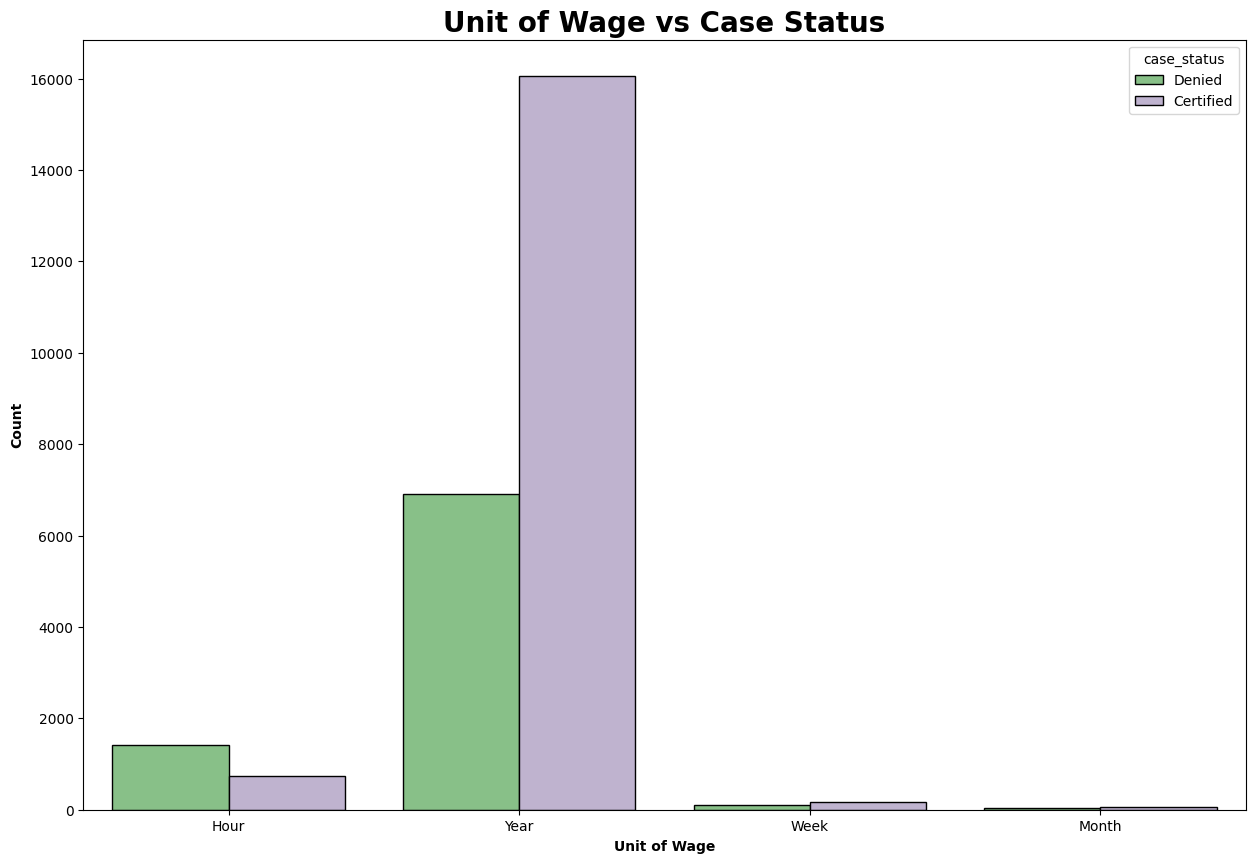

In [35]:
plt.figure(figsize=(15,10))
sns.countplot(x = 'unit_of_wage' , data = df , hue = 'case_status' , ec = 'black' , palette='Accent')
plt.title("Unit of Wage vs Case Status" , weight = 'bold' , fontsize = 20)
plt.xlabel("Unit of Wage" , weight = 'bold')
plt.ylabel("Count" , weight = 'bold')
plt.show()


#### Insight 
* From the above plot we got to know that the Annual wage has more acceptance rate 

#### Does region of employement has any impact on the Case status

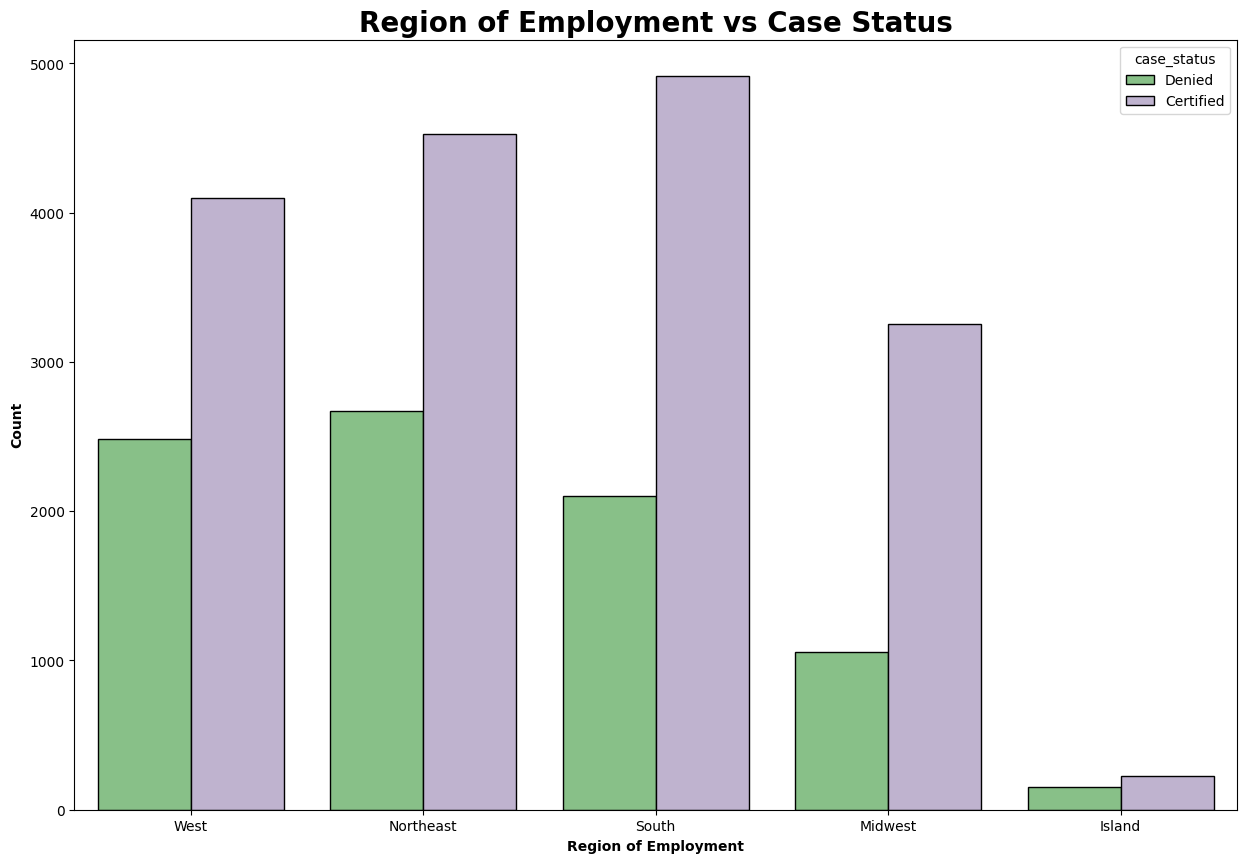

In [36]:
plt.figure(figsize=(15,10))
sns.countplot(x = 'region_of_employment' , hue='case_status' ,data = df , palette="Accent" , ec = 'k')
plt.title("Region of Employment vs Case Status" , weight = 'bold' , fontsize = 20)
plt.xlabel("Region of Employment" , weight = 'bold')
plt.ylabel("Count" , weight = 'bold')
plt.show()

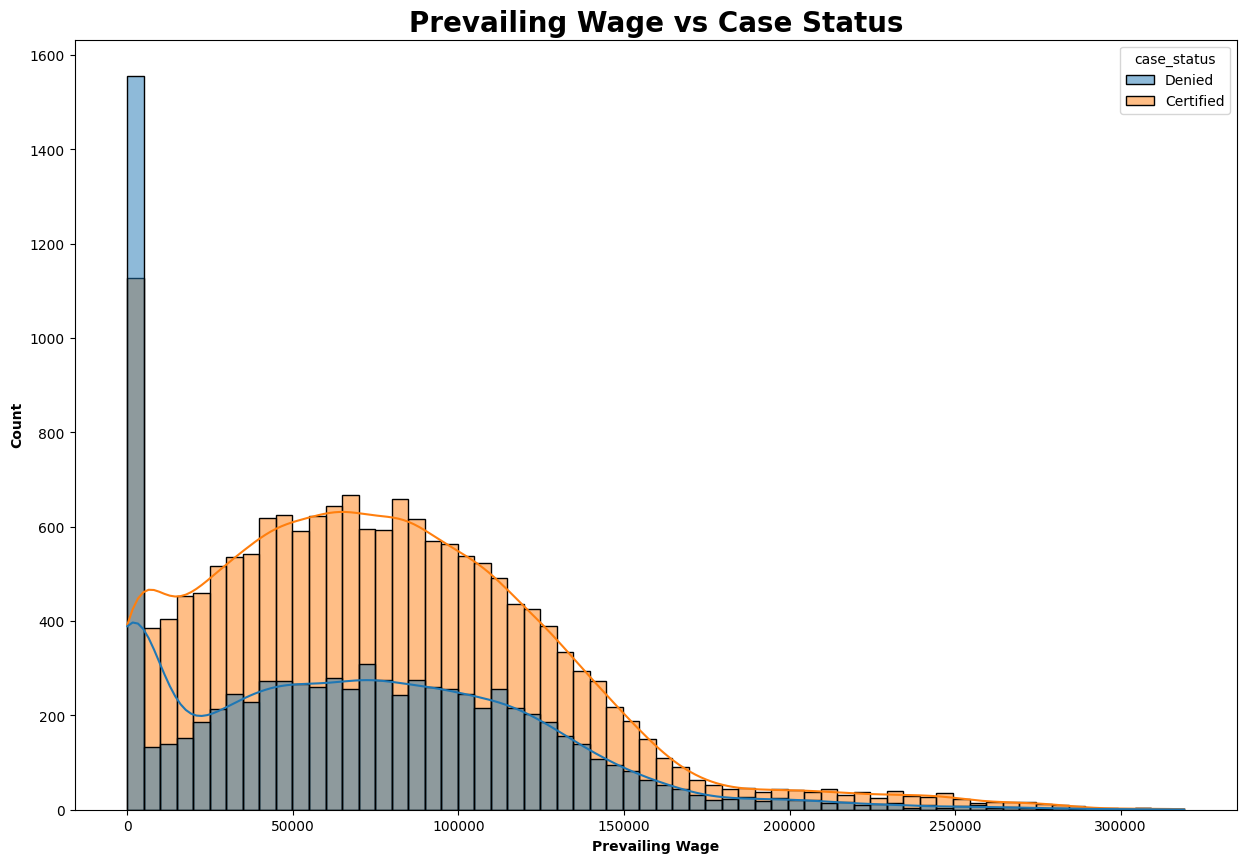

In [37]:
plt.subplots(figsize=(15,10))
sns.histplot(x = 'prevailing_wage' , hue='case_status' , data = df , kde=True)
plt.title("Prevailing Wage vs Case Status" , weight = 'bold' , fontsize = 20)
plt.xlabel("Prevailing Wage" , weight = 'bold')
plt.ylabel("Count" , weight = 'bold')
plt.show()


### get to know the education has  impact on the wage

In [38]:
df.groupby('education_of_employee')['prevailing_wage'].mean() \
  .to_frame().sort_values(by='prevailing_wage', ascending=False)


,prevailing_wage
education_of_employee,
Master's,78843.057843
Bachelor's,73405.443735
High School,71582.147756
Doctorate,64561.076657


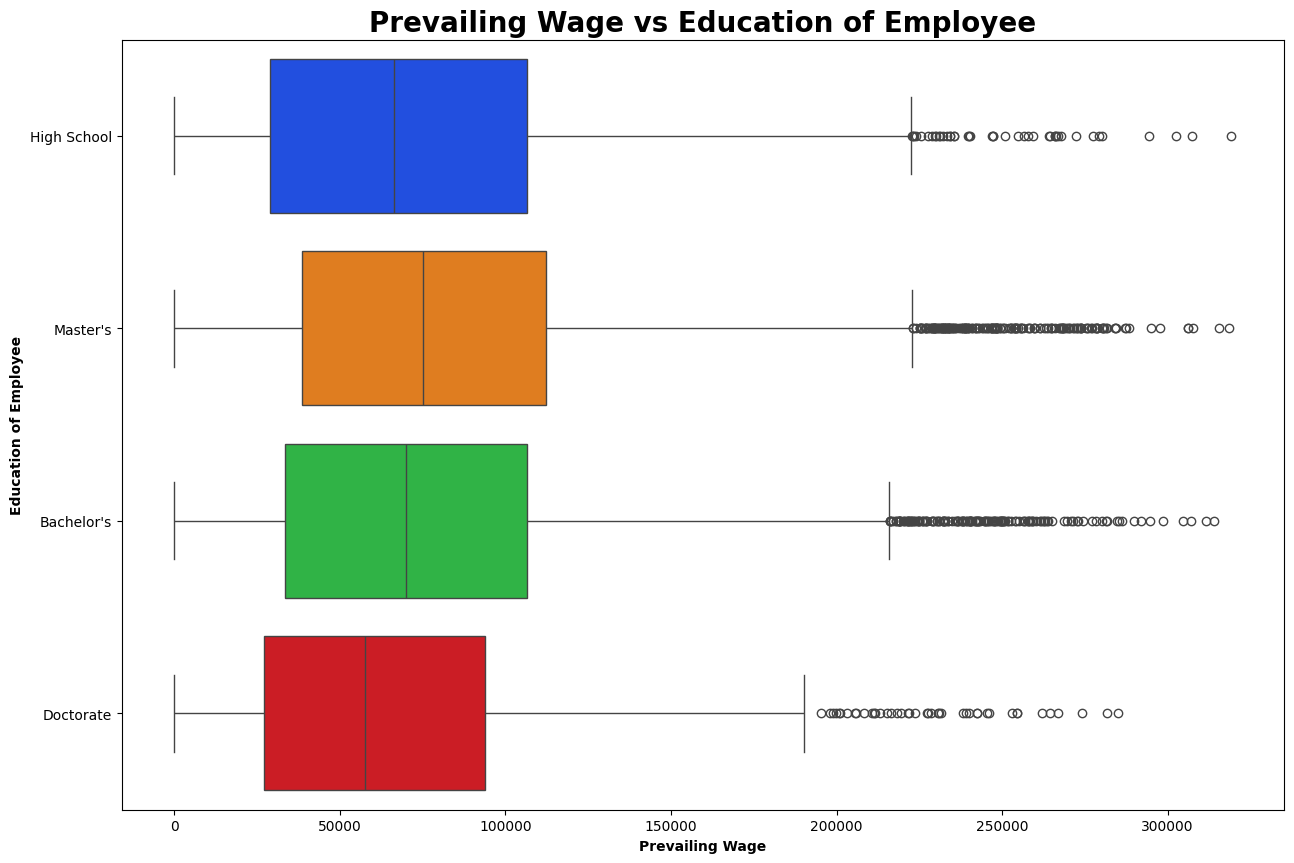

In [39]:
plt.subplots(figsize = (15,10))
sns.boxplot(x = 'prevailing_wage' , y = 'education_of_employee' , data = df , palette="bright")
plt.title("Prevailing Wage vs Education of Employee" , weight = 'bold' , fontsize = 20)
plt.xlabel("Prevailing Wage" , weight = 'bold')
plt.ylabel("Education of Employee" , weight = 'bold')
plt.show()


### prevailing wage based on the work experience

In [40]:
df.groupby('has_job_experience')['prevailing_wage'].mean().to_frame().sort_values(by = 'prevailing_wage' , ascending = False)

,prevailing_wage
has_job_experience,
N,75464.159920
Y,73728.405363


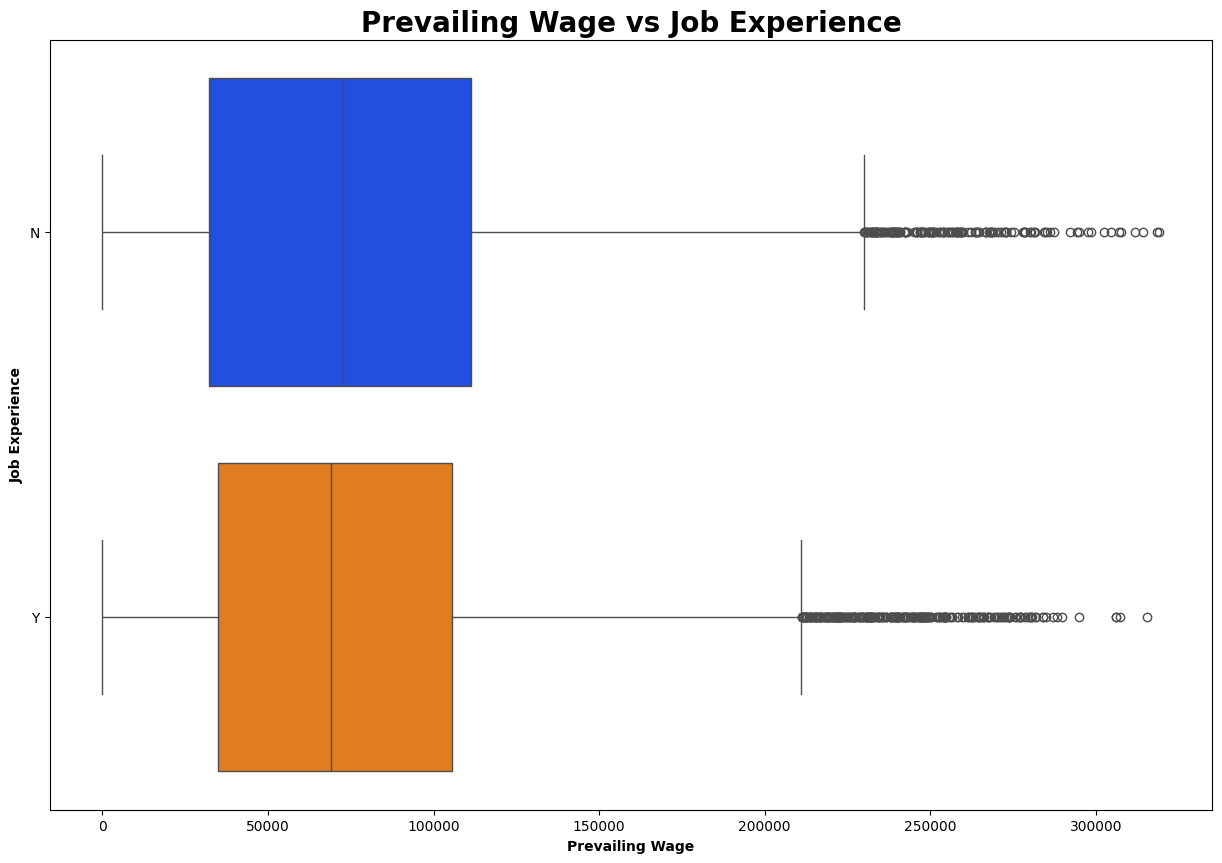

In [41]:
plt.subplots(figsize = (15,10))
sns.boxplot(x = 'prevailing_wage' , y = 'has_job_experience' , data = df , palette="bright")
plt.title("Prevailing Wage vs Job Experience" , weight = 'bold' , fontsize = 20)
plt.xlabel("Prevailing Wage" , weight = 'bold')
plt.ylabel("Job Experience" , weight = 'bold')
plt.show()

### Based on the continent and the prevaiing wages

In [42]:
df.groupby('continent')['prevailing_wage'].mean().to_frame().sort_values(by = "prevailing_wage" , ascending = False)

,prevailing_wage
continent,
Asia,79543.021780
Africa,77425.923450
Oceania,75994.276719
North America,68066.319257
South America,60209.575314
Europe,59842.925899


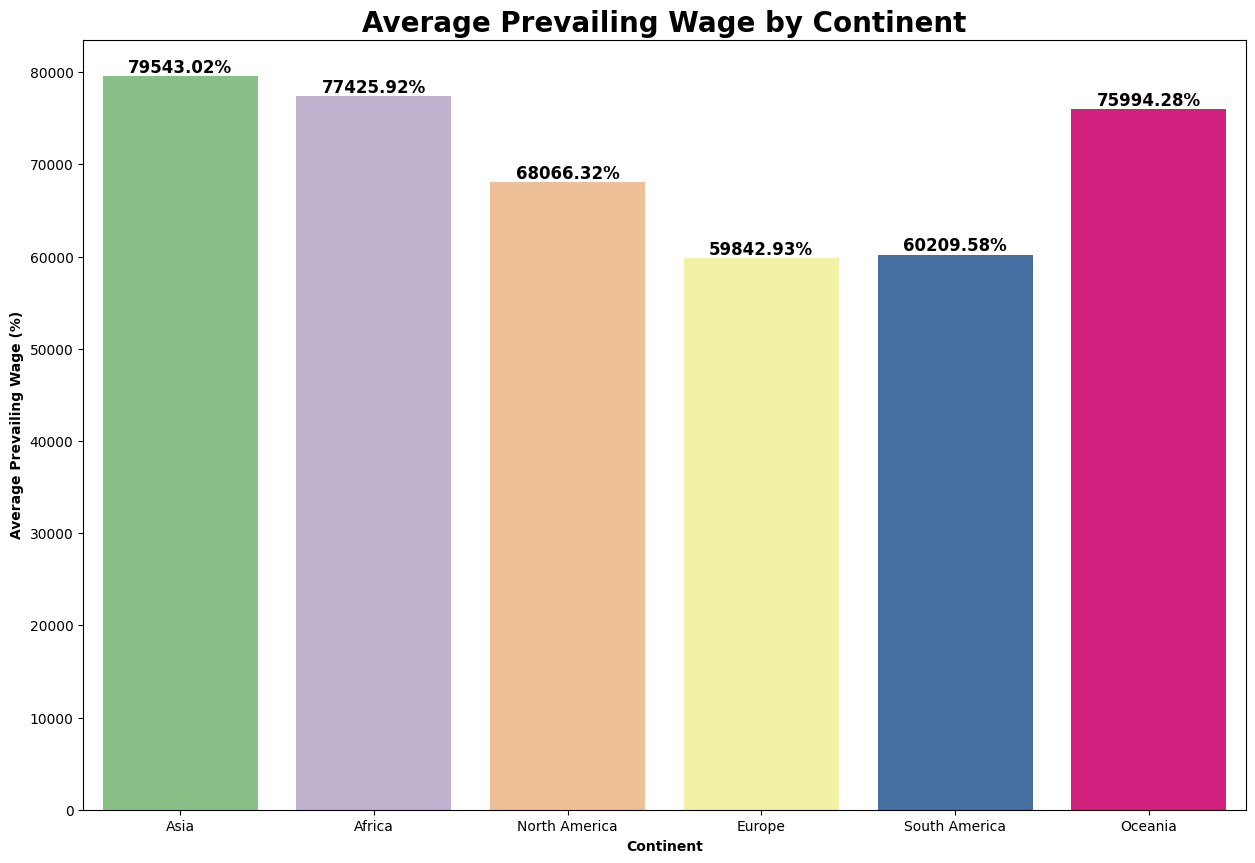

In [43]:
plt.figure(figsize=(15, 10))

# Create the bar plot
ax = sns.barplot(x='continent', y='prevailing_wage', data=df, palette="Accent", ci=None)

# Add annotations for the percentages
for p in ax.patches:
    percentage = f'{p.get_height():.2f}%'  # Format the percentage with 2 decimal places
    ax.annotate(percentage, 
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position at the center of the bar
                ha='center', va='bottom', fontsize=12, color='black', weight='bold')

# Add titles and labels
plt.title("Average Prevailing Wage by Continent", weight='bold', fontsize=20)
plt.xlabel("Continent", weight='bold')
plt.ylabel("Average Prevailing Wage (%)", weight='bold')
plt.show()


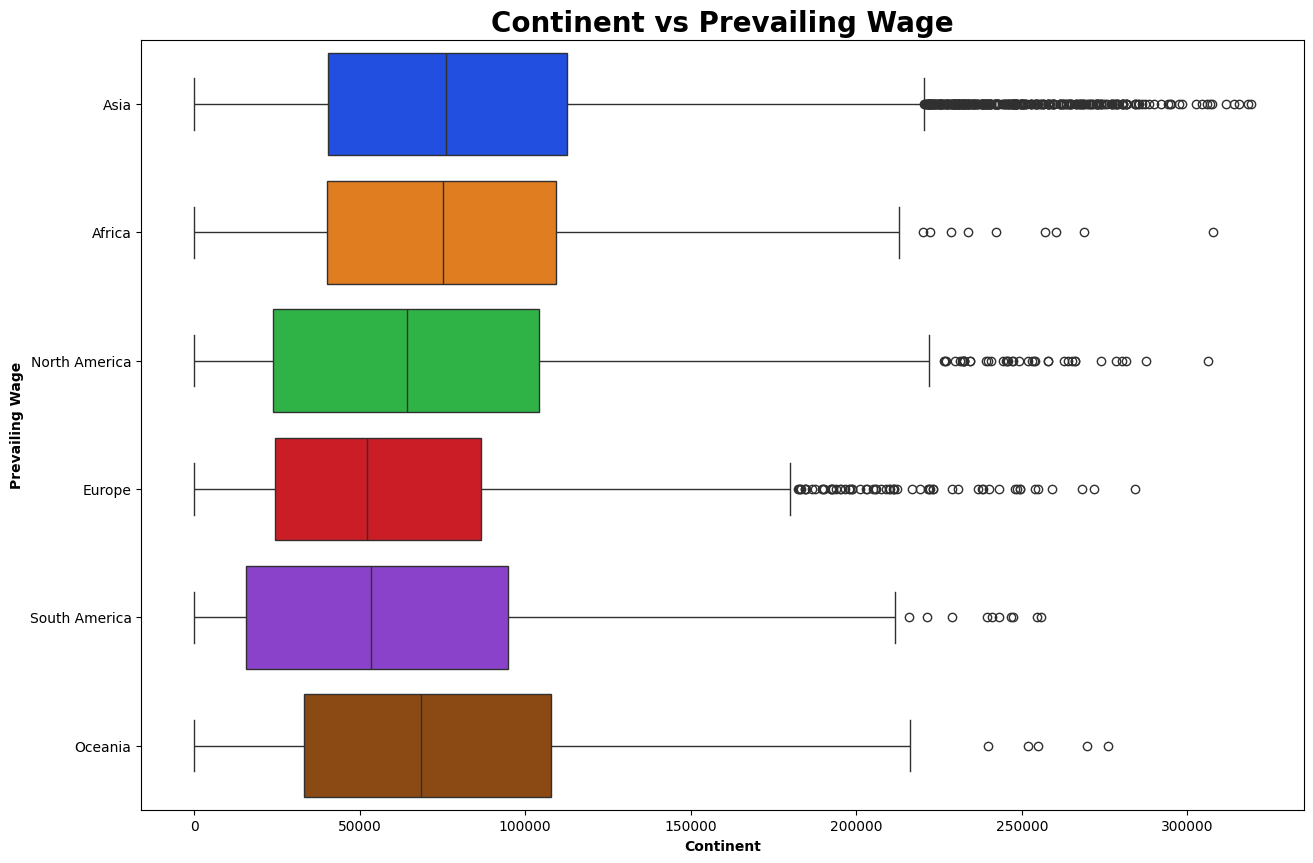

In [44]:
plt.subplots(figsize=(15,10))
sns.boxplot(x = 'prevailing_wage' , y = 'continent' , data = df ,palette = "bright")
plt.title("Continent vs Prevailing Wage" , weight = 'bold' , fontsize = 20)
plt.xlabel("Continent" , weight = 'bold')
plt.ylabel("Prevailing Wage" , weight = 'bold')
plt.show()

#### year of established has any impact on the visa status 

In [45]:
df.groupby('yr_of_estab')['case_status'].value_counts(normalize = True).to_frame()*100

proportion
yr_of_estab case_status            
1800        Certified     68.750000
            Denied        31.250000
1801        Certified     50.000000
            Denied        50.000000
1804        Certified     55.555556
...                             ...
2014        Denied        32.571429
2015        Certified     56.250000
            Denied        43.750000
2016        Certified     56.521739
            Denied        43.478261

[395 rows x 1 columns]

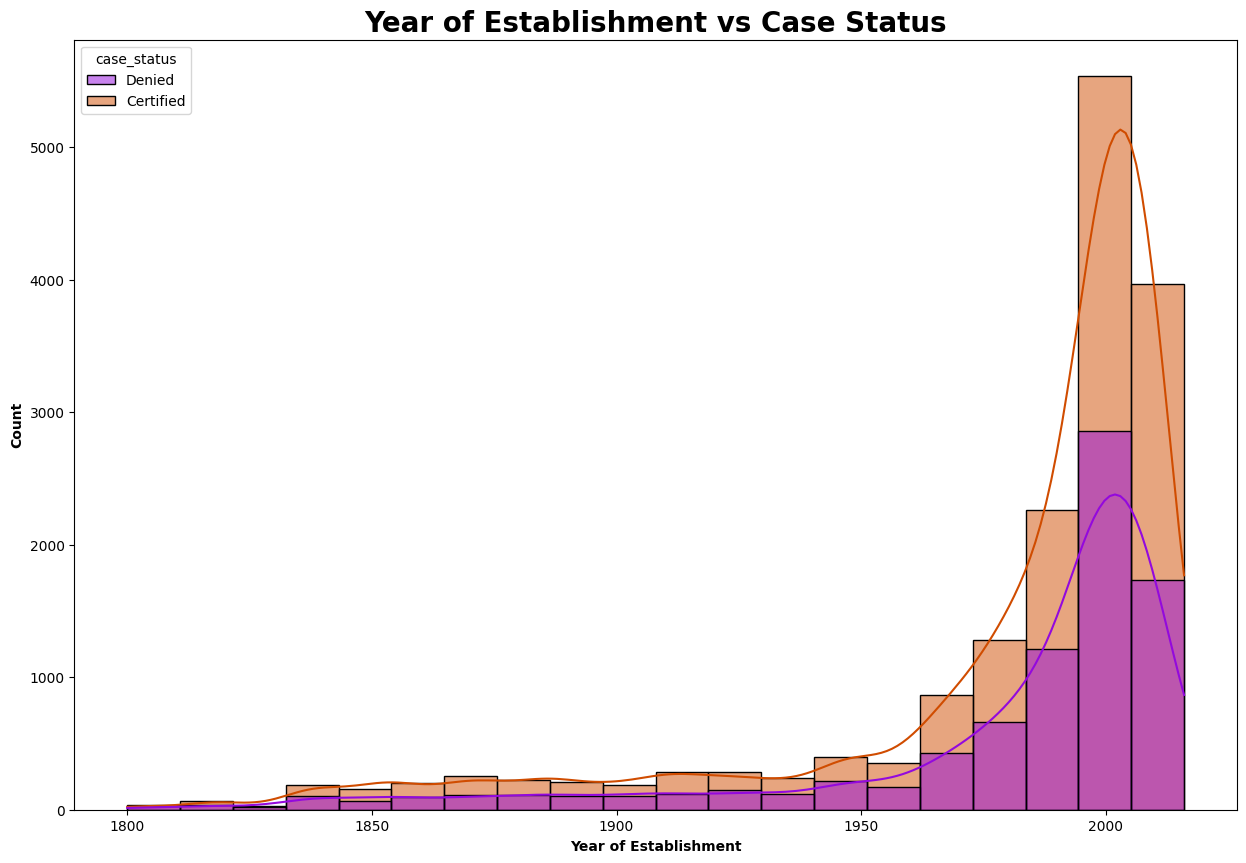

In [46]:
plt.subplots(figsize = (15,10))
sns.histplot(x = 'yr_of_estab' , hue='case_status' , bins = 20 , kde = True ,data = df , palette='gnuplot')
plt.title("Year of Establishment vs Case Status" , weight = 'bold' , fontsize = 20)
plt.xlabel("Year of Establishment" , weight = 'bold')
plt.ylabel("Count" , weight = 'bold')
plt.show()